In [1]:
import numpy as np
import pandas as pd
import pickle
data1 = pickle.load( open('data1.pckl','rb'))
data1

,英文名称,CAS号,实验值logK,CAS_NUMBER,smile
0,flufenoxuron,101463-69-8,-1.724,'101463-69-8',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=C(C=C(C=C2)OC3...
1,diflubenzuron,35367-38-5,-1.563,'35367-38-5',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC=C(C=C2)Cl)F
2,famoxadone,131807-57-3,1.031,'131807-57-3',CC1(C(=O)N(C(=O)O1)NC2=CC=CC=C2)C3=CC=C(C=C3)O...
3,oxadiazon,19666-30-9,-1.740,'19666-30-9',CC(C)OC1=C(C=C(C(=C1)N2C(=O)OC(=N2)C(C)(C)C)Cl)Cl
4,flumioxazin,103361-09-7,1.841,'103361-09-7',C#CCN1C(=O)COC2=CC(=C(C=C21)N3C(=O)C4=C(C3=O)C...
...,...,...,...,...,...
88,tribenuron-methyl,101200-48-0,1.461,'101200-48-0',CC1=NC(=NC(=N1)OC)N(C)C(=O)NS(=O)(=O)C2=CC=CC=...
89,chlorantraniliprole,500008-45-7,-1.161,'500008-45-7',CC1=CC(=CC(=C1NC(=O)C2=CC(=NN2C3=C(C=CC=N3)Cl)...
90,cefoxitin,35607-66-0,-0.979,'35607-66-0',CO[C@@]1([C@@H]2N(C1=O)C(=C(CS2)COC(=O)N)C(=O)...
91,ccphradinc,38821-53-3,-0.983,'38821-53-3',CC1=C(N2[C@@H]([C@@H](C2=O)NC(=O)[C@@H](C3=CCC...


In [2]:
import numpy as np
import pandas as pd
import sys, os
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

In [3]:
model = word2vec.Word2Vec.load(r'D:\AI-Drug\Rate Prediction\mol2vec_document\mol2vec-master\examples\models\model_300dim.pkl')

In [4]:
mols=[Chem.MolFromSmiles(x) for x in data1['smile']]
data1['ROMol']=mols
data1.head(5)

,英文名称,CAS号,实验值logK,CAS_NUMBER,smile,ROMol
0,flufenoxuron,101463-69-8,-1.724,'101463-69-8',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=C(C=C(C=C2)OC3...,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...
1,diflubenzuron,35367-38-5,-1.563,'35367-38-5',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC=C(C=C2)Cl)F,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...
2,famoxadone,131807-57-3,1.031,'131807-57-3',CC1(C(=O)N(C(=O)O1)NC2=CC=CC=C2)C3=CC=C(C=C3)O...,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...
3,oxadiazon,19666-30-9,-1.740,'19666-30-9',CC(C)OC1=C(C=C(C(=C1)N2C(=O)OC(=N2)C(C)(C)C)Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...
4,flumioxazin,103361-09-7,1.841,'103361-09-7',C#CCN1C(=O)COC2=CC(=C(C=C21)N3C(=O)C4=C(C3=O)C...,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...


In [5]:
data1['sentence'] = data1.apply(lambda x: MolSentence(mol2alt_sentence(x['ROMol'], 1)), axis=1)
data1['mol2vec'] = [DfVec(x) for x in sentences2vec(data1['sentence'], model, unseen='UNK')]
data1.head()

,英文名称,CAS号,实验值logK,CAS_NUMBER,smile,ROMol,sentence,mol2vec
0,flufenoxuron,101463-69-8,-1.724,'101463-69-8',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=C(C=C(C=C2)OC3...,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...,"(3218693969, 98513984, 3218693969, 951226070, ...","(300,) dimensional vector"
1,diflubenzuron,35367-38-5,-1.563,'35367-38-5',C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC=C(C=C2)Cl)F,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...,"(3218693969, 98513984, 3218693969, 951226070, ...","(300,) dimensional vector"
2,famoxadone,131807-57-3,1.031,'131807-57-3',CC1(C(=O)N(C(=O)O1)NC2=CC=CC=C2)C3=CC=C(C=C3)O...,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...,"(2246728737, 1861965050, 2976816164, 78708495,...","(300,) dimensional vector"
3,oxadiazon,19666-30-9,-1.740,'19666-30-9',CC(C)OC1=C(C=C(C(=C1)N2C(=O)OC(=N2)C(C)(C)C)Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...,"(2246728737, 3537119515, 2245273601, 161922245...","(300,) dimensional vector"
4,flumioxazin,103361-09-7,1.841,'103361-09-7',C#CCN1C(=O)COC2=CC(=C(C=C21)N3C(=O)C4=C(C3=O)C...,<rdkit.Chem.rdchem.Mol object at 0x0000016FEE7...,"(2245897107, 3492293582, 2245900962, 363336963...","(300,) dimensional vector"


In [6]:
X = np.array([x.vec for x in data1['mol2vec']])
print(np.shape(X))

(93, 300)


In [8]:
from sklearn.decomposition import PCA
pca=PCA(14)
pca.fit(X)
X_pca=pca.transform(X)
print(np.shape(X_pca))

(93, 14)


In [9]:
y=data1['实验值logK']

In [48]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
mse_test_list=[]
for i in range(0,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=100,randam_state=100,alpha=0.5)
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_metric=["rmse"], eval_set=eval_set, verbose=True)
    test_predict=model.predict(X_test)
    train_predict = model.predict(X_train)
    msetest=mean_squared_error(y_test,test_predict)
    mse_test_list.append(msetest)
    msetrain=mean_squared_error(y_train,train_predict)
    print('rmsetest is:',msetest)
    print('rmsetrain is:',msetrain)
    results = model.evals_result()
    epochs = len(results['validation_0']['rmse'])
    x_axis = range(0, epochs)
    
mse_test_list=np.array(mse_test_list)
msetest_mean=np.mean(mse_test_list)
print(msetest_mean)

[21:42:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "randam_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1.93609	validation_1-rmse:1.48422
[1]	validation_0-rmse:1.77227	validation_1-rmse:1.42732
[2]	validation_0-rmse:1.62398	validation_1-rmse:1.36983
[3]	validation_0-rmse:1.49006	validation_1-rmse:1.36118
[4]	validation_0-rmse:1.37106	validation_1-rmse:1.32987
[5]	validation_0-rmse:1.26079	validation_1-rmse:1.29110
[6]	validation_0-rmse:1.16069	validation_1-rmse:1.25829
[7]	validation_0-rmse:1.07231	validation_1-rmse:1.25099
[8]	validation_0-rmse:0.99036	validation_1-rmse:1.21808
[9]	validation_0-rmse:0.91781	validation_1-rmse:1.20817
[10]	validation_0-r

C:\Users\Zhouhaifan\.conda\envs\py37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[55]	validation_0-rmse:0.15517	validation_1-rmse:1.15256
[56]	validation_0-rmse:0.15381	validation_1-rmse:1.15251
[57]	validation_0-rmse:0.15286	validation_1-rmse:1.15348
[58]	validation_0-rmse:0.15191	validation_1-rmse:1.15365
[59]	validation_0-rmse:0.15098	validation_1-rmse:1.15420
[60]	validation_0-rmse:0.15016	validation_1-rmse:1.15346
[61]	validation_0-rmse:0.14941	validation_1-rmse:1.15349
[62]	validation_0-rmse:0.14874	validation_1-rmse:1.15353
[63]	validation_0-rmse:0.14811	validation_1-rmse:1.15391
[64]	validation_0-rmse:0.14743	validation_1-rmse:1.15429
[65]	validation_0-rmse:0.14666	validation_1-rmse:1.15417
[66]	validation_0-rmse:0.14611	validation_1-rmse:1.15449
[67]	validation_0-rmse:0.14564	validation_1-rmse:1.15452
[68]	validation_0-rmse:0.14518	validation_1-rmse:1.15444
[69]	validation_0-rmse:0.14478	validation_1-rmse:1.15447
[70]	validation_0-rmse:0.14442	validation_1-rmse:1.15450
[71]	validation_0-rmse:0.14402	validation_1-rmse:1.15394
[72]	validation_0-rmse:0.14362	

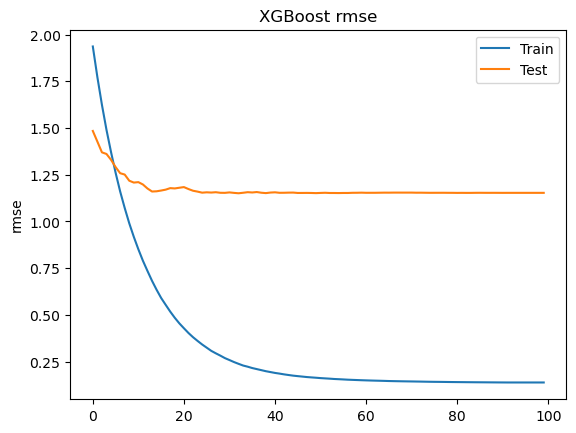

In [49]:
from matplotlib import pyplot
fig1, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse')
pyplot.title('XGBoost rmse')
pyplot.show()
